In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import shuffle
from scipy.integrate import ode, odeint
from scipy.sparse import csgraph
from scipy.signal import find_peaks
from scipy.spatial import distance
from scipy.stats import norm
from scipy.interpolate import interp1d
from matplotlib.pylab import rcParams
from matplotlib import animation
import pickle
import collections
from IPython.display import HTML

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
rcParams['animation.html'] = 'html5'

In [12]:
def phaseInterpol(x):
    peaks, _ = find_peaks(x,height=1,distance=40)#, distance=LC_sample[0,nr,2]/dt*0.6)
#     peaks = np.insert(peaks, 0, 0)
    Ts =np.diff(peaks)
    head =np.linspace(0,2*np.pi,num= Ts[0])[-peaks[0]-1:-1]
    phase = np.concatenate([np.linspace(0,2*np.pi,num=Tn+1)[:-1] for Tn in Ts])
    if peaks[0] != 0:
        phase = np.concatenate((head,phase ))
    while len(phase) < len(x):
        phase = np.concatenate((phase, np.linspace(0,2*np.pi,num=Ts[-1]) ))[:len(x)]
    return phase

In [21]:
np.random.seed(3) 
mean_w = 0.75                            #mean of distribution of natural frequencies of oscillators
std_w = 0.05                           #standard deviation of disribution of natural freqs
N=1000
# K = None #will loop over this          #coupling strength
sample = np.random.normal(mean_w, std_w, N)
g0= norm.pdf(0,0,std_w)
Kc=2/(np.pi*g0)
print("Critical Value of Coupling: ",Kc)

Critical Value of Coupling:  0.07978845608028654


In [23]:
arg = sample.argsort()

In [2]:
with open('./data/JN_N_1000_K_10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    JN10 = pickle.load(f)

In [3]:
with open('./data/JN_N_1000_K_100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    JN100 = pickle.load(f)

In [4]:
with open('./data/JN_N_1000_K_1000.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    JN1000 = pickle.load(f)

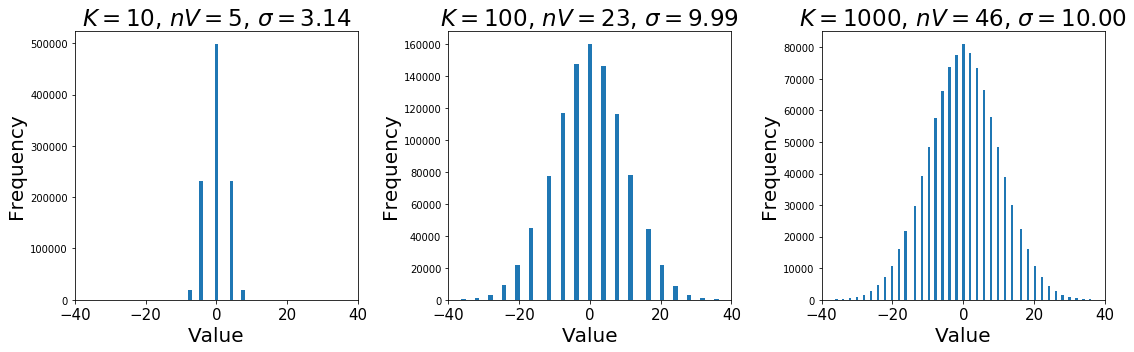

In [8]:
rcParams['figure.figsize'] = 16, 5
ticksize = 15
titelsize = 23
labelsize =20
legendsize = 20

plt.subplot(1,3,1)
nV = len(collections.Counter(JN10.flatten()))
plt.hist(JN10.flatten(),bins=3*nV)
plt.title(r'$K=10$, $nV =%2d $, $\sigma = %2.2f$'%(nV,np.std(JN10.flatten())),fontsize=titelsize)
plt.tick_params(axis='x', which='major', labelsize=ticksize)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.xlabel(r'Value',fontsize=labelsize)
plt.ylabel(r'Frequency',fontsize=labelsize)
plt.xlim([-40,40])

plt.subplot(1,3,2)
nV = len(collections.Counter(JN100.flatten()))
plt.hist(JN100.flatten(),bins=3*nV)
plt.title(r'$K=100$, $nV =%2d $, $\sigma = %2.2f$'%(nV,np.std(JN100.flatten())),fontsize=titelsize)
plt.tick_params(axis='x', which='major', labelsize=ticksize)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.xlabel(r'Value',fontsize=labelsize)
plt.ylabel(r'Frequency',fontsize=labelsize)
plt.xlim([-40,40])

plt.subplot(1,3,3)
nV = len(collections.Counter(JN1000.flatten()))
plt.hist(JN1000.flatten(),bins=3*nV)
plt.title(r'$K=1000$, $nV =%2d $, $\sigma = %2.2f$'%(nV,np.std(JN1000.flatten())),fontsize=titelsize)
plt.tick_params(axis='x', which='major', labelsize=ticksize)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.xlabel(r'Value',fontsize=labelsize)
plt.ylabel(r'Frequency',fontsize=labelsize)
plt.xlim([-40,40])

plt.tight_layout()

# High-Rank

## $\alpha=1$

In [5]:
with open('./data/phasesDyn_alpha1.000_J0.2_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn02 = pickle.load(f)

In [6]:
with open('./data/phasesDyn_alpha1.000_J5.0_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn5 = pickle.load(f)

In [7]:
with open('./data/phasesDyn_alpha1.000_J10.0_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn10 = pickle.load(f)

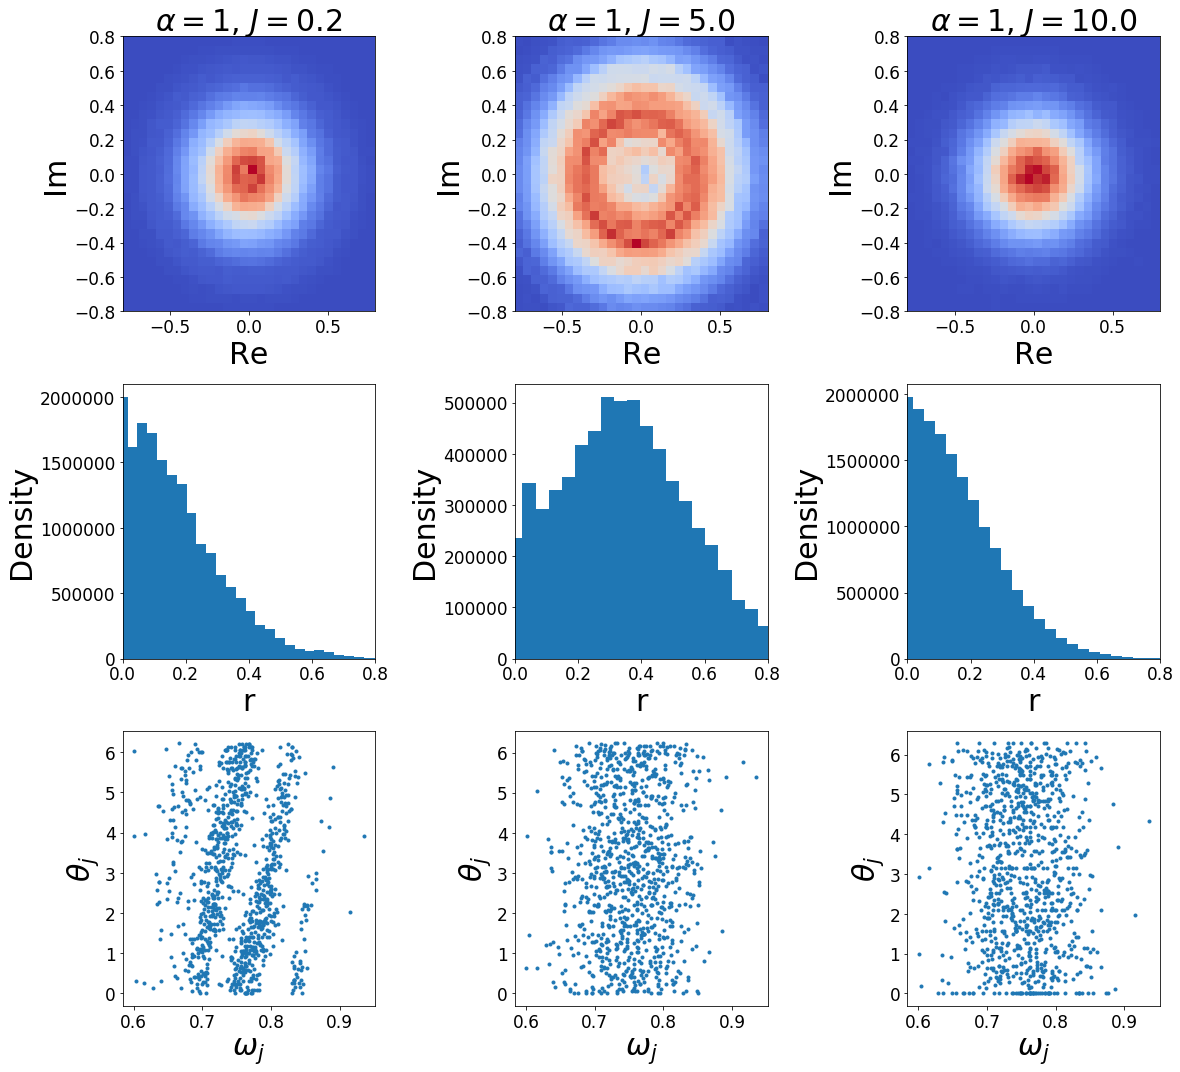

In [30]:
# rcParams['figure.figsize'] = 16, 5
# rcParams['figure.figsize'] = 4.85, 10
ticksize = 17
titelsize = 30
labelsize =30
legendsize = 20
t_start = 800
lim=.8
alpha = 1
bins =30
JN=JN1000
t =-100
f,ax = plt.subplots(3,3,figsize=(5.5*3,15))

# J=0.2
phasesDyn=phasesDyn02
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=0.2
x = LF.flatten().real
y = LF.flatten().imag


ax[0][0].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][0].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][0].set_xlabel(r'Re',fontsize=labelsize)
ax[0][0].set_ylabel(r'Im',fontsize=labelsize)


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][0].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
# ax[1].set_title(r'$\alpha$=%2d, J=%2.1f'%(alpha,J),fontsize=titelsize)
ax[1][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][0].set_xlabel(r'r',fontsize=labelsize)
ax[1][0].set_ylabel(r'Density',fontsize=labelsize)
ax[1][0].set_xlim((0,lim))


ax[2][0].plot(sample[arg], phasesDyn[t][arg],'.')
ax[2][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][0].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][0].set_ylabel(r'$\theta_j$',fontsize=labelsize)


# J=5
phasesDyn =phasesDyn5
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=5
x = LF.flatten().real
y = LF.flatten().imag


ax[0][1].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][1].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][1].set_xlabel(r'Re',fontsize=labelsize)
ax[0][1].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][1].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][1].set_xlabel(r'r',fontsize=labelsize)
ax[1][1].set_ylabel(r'Density',fontsize=labelsize)
ax[1][1].set_xlim((0,lim))

ax[2][1].plot(sample[arg], phasesDyn[t][arg],'.')
ax[2][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][1].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][1].set_ylabel(r'$\theta_j$',fontsize=labelsize)

# J=10
phasesDyn=phasesDyn10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=10
x = LF.flatten().real
y = LF.flatten().imag


ax[0][2].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][2].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][2].set_xlabel(r'Re',fontsize=labelsize)
ax[0][2].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][2].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][2].set_xlabel(r'r',fontsize=labelsize)
ax[1][2].set_ylabel(r'Density',fontsize=labelsize)
ax[1][2].set_xlim((0,lim))

ax[2][2].plot(sample[arg], phasesDyn[t][arg],'.')
ax[2][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][2].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][2].set_ylabel(r'$\theta_j$',fontsize=labelsize)

plt.tight_layout()


## $\alpha =10$

In [11]:
with open('./data/pointsnxy_alpha10.000_J0.3_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [13]:
xs= pointsnxy[:,0,:].T
phasesDyn03a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [14]:
with open('./data/pointsnxy_alpha10.000_J2.9_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [15]:
xs= pointsnxy[:,0,:].T
phasesDyn29a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [18]:
with open('./data/pointsnxy_alpha10.000_J3.0_y_t100.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [19]:
xs= pointsnxy[:,0,:].T
phasesDyn30a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

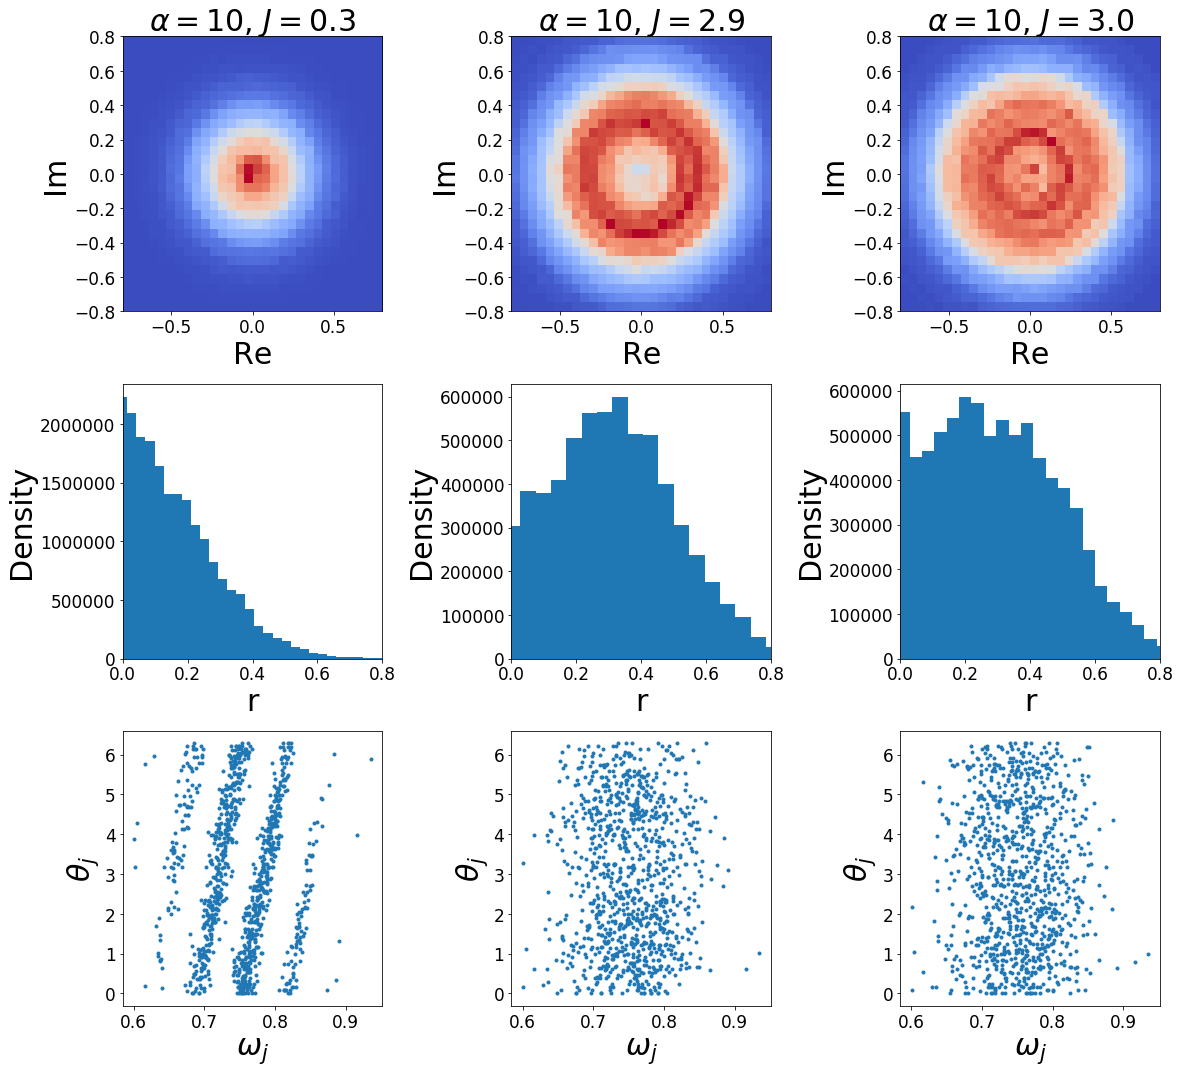

In [24]:
# rcParams['figure.figsize'] = 16, 5
# rcParams['figure.figsize'] = 4.85, 10
ticksize = 17
titelsize = 30
labelsize =30
legendsize = 20
t_start = 800
lim=.8
alpha = 10
bins =30
JN=JN1000

f,ax = plt.subplots(3,3,figsize=(5.5*3,15))

# J=0.3
phasesDyn=phasesDyn03a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=0.3
x = LF.flatten().real
y = LF.flatten().imag


ax[0][0].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][0].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][0].set_xlabel(r'Re',fontsize=labelsize)
ax[0][0].set_ylabel(r'Im',fontsize=labelsize)


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][0].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][0].set_xlabel(r'r',fontsize=labelsize)
ax[1][0].set_ylabel(r'Density',fontsize=labelsize)
ax[1][0].set_xlim((0,lim))


ax[2][0].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[2][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][0].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][0].set_ylabel(r'$\theta_j$',fontsize=labelsize)


# J=2.9
phasesDyn =phasesDyn29a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=2.9
x = LF.flatten().real
y = LF.flatten().imag


ax[0][1].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][1].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][1].set_xlabel(r'Re',fontsize=labelsize)
ax[0][1].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][1].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][1].set_xlabel(r'r',fontsize=labelsize)
ax[1][1].set_ylabel(r'Density',fontsize=labelsize)
ax[1][1].set_xlim((0,lim))

ax[2][1].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[2][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][1].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][1].set_ylabel(r'$\theta_j$',fontsize=labelsize)

# J=3
phasesDyn=phasesDyn30a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=3
x = LF.flatten().real
y = LF.flatten().imag


ax[0][2].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][2].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][2].set_xlabel(r'Re',fontsize=labelsize)
ax[0][2].set_ylabel(r'Im',fontsize=labelsize)


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][2].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][2].set_xlabel(r'r',fontsize=labelsize)
ax[1][2].set_ylabel(r'Density',fontsize=labelsize)
ax[1][2].set_xlim((0,lim))

ax[2][2].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[2][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][2].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[2][2].set_ylabel(r'$\theta_j$',fontsize=labelsize)

plt.tight_layout()

# low-rank

In [17]:
JN= JN10

## $\alpha =1$

In [25]:
with open('./data/phasesDyn_alpha1.000_J0.2_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn02 = pickle.load(f)

In [26]:
with open('./data/phasesDyn_alpha1.000_J5.0_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn5 = pickle.load(f)

In [27]:
with open('./data/phasesDyn_alpha1.000_J20.0_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    phasesDyn20 = pickle.load(f)

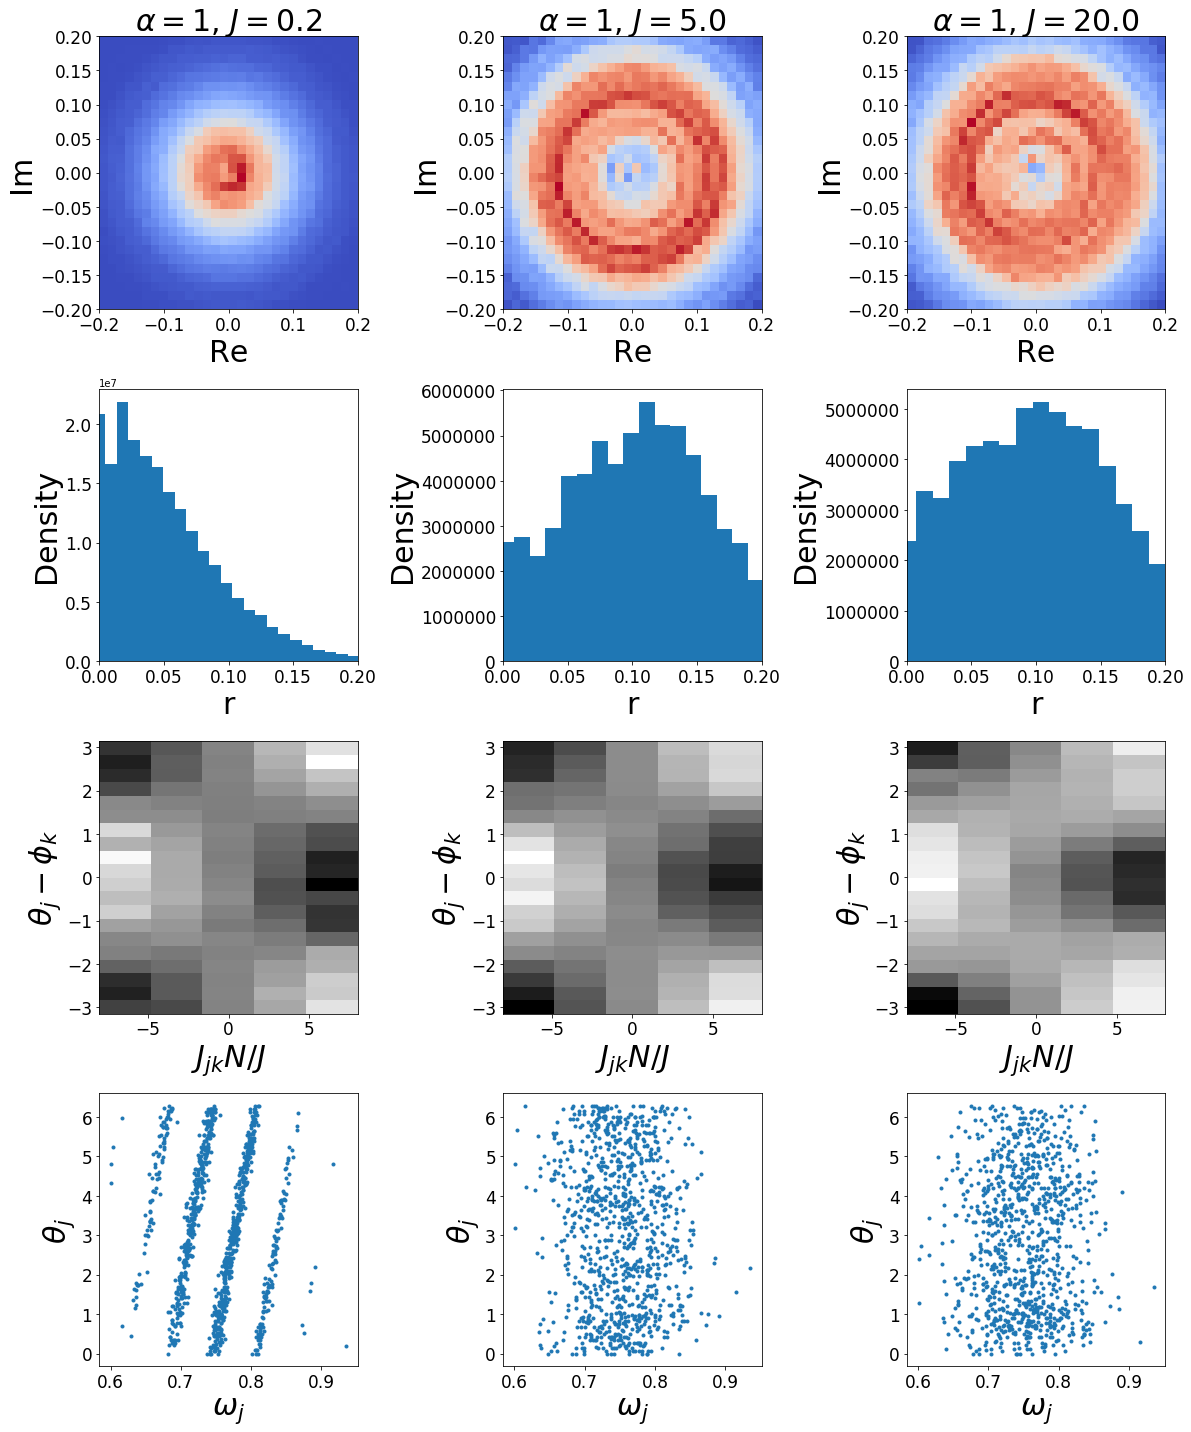

In [22]:
# rcParams['figure.figsize'] = 16, 5
# rcParams['figure.figsize'] = 4.85, 10
ticksize = 17
titelsize = 30
labelsize =30
legendsize = 20
t_start = 800
lim=.2
alpha = 1
bins =30

f,ax = plt.subplots(4,3,figsize=(5.5*3,20))
# J=0.2
phasesDyn= phasesDyn02
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=0.2
x = LF.flatten().real
y = LF.flatten().imag


ax[0][0].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][0].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][0].set_xlabel(r'Re',fontsize=labelsize)
ax[0][0].set_ylabel(r'Im',fontsize=labelsize)


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][0].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][0].set_xlabel(r'r',fontsize=labelsize)
ax[1][0].set_ylabel(r'Density',fontsize=labelsize)
ax[1][0].set_xlim((0,lim))

theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()

H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][0].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][0].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][0].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)


ax[3][0].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][0].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][0].set_ylabel(r'$\theta_j$',fontsize=labelsize)


# J=5
phasesDyn =phasesDyn5
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=5
x = LF.flatten().real
y = LF.flatten().imag


ax[0][1].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][1].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][1].set_xlabel(r'Re',fontsize=labelsize)
ax[0][1].set_ylabel(r'Im',fontsize=labelsize)

hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][1].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][1].set_xlabel(r'r',fontsize=labelsize)
ax[1][1].set_ylabel(r'Density',fontsize=labelsize)
ax[1][1].set_xlim((0,lim))


theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()

H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][1].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][1].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][1].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)



ax[3][1].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][1].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][1].set_ylabel(r'$\theta_j$',fontsize=labelsize)

# J=20
phasesDyn=phasesDyn20
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=20
x = LF.flatten().real
y = LF.flatten().imag


ax[0][2].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][2].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][2].set_xlabel(r'Re',fontsize=labelsize)
ax[0][2].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][2].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
# ax[1].set_title(r'$\alpha$=%2d, J=%2.1f'%(alpha,J),fontsize=titelsize)
ax[1][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][2].set_xlabel(r'r',fontsize=labelsize)
ax[1][2].set_ylabel(r'Density',fontsize=labelsize)
ax[1][2].set_xlim((0,lim))

theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()



H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][2].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][2].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][2].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)

ax[3][2].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][2].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][2].set_ylabel(r'$\theta_j$',fontsize=labelsize)

plt.tight_layout()

In [28]:
with open('./data/pointsnxy_alpha10.000_J0.3_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [29]:
xs= pointsnxy[:,0,:].T
phasesDyn03a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [30]:
with open('./data/pointsnxy_alpha10.000_J10.0_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [31]:
xs= pointsnxy[:,0,:].T
phasesDyn10a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

In [32]:
with open('./data/pointsnxy_alpha1.000_J20.0_y_t100_K10.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    pointsnxy = pickle.load(f)

In [33]:
xs= pointsnxy[:,0,:].T
phasesDyn20a10 = np.concatenate([[phaseInterpol(test)] for test in xs]).T

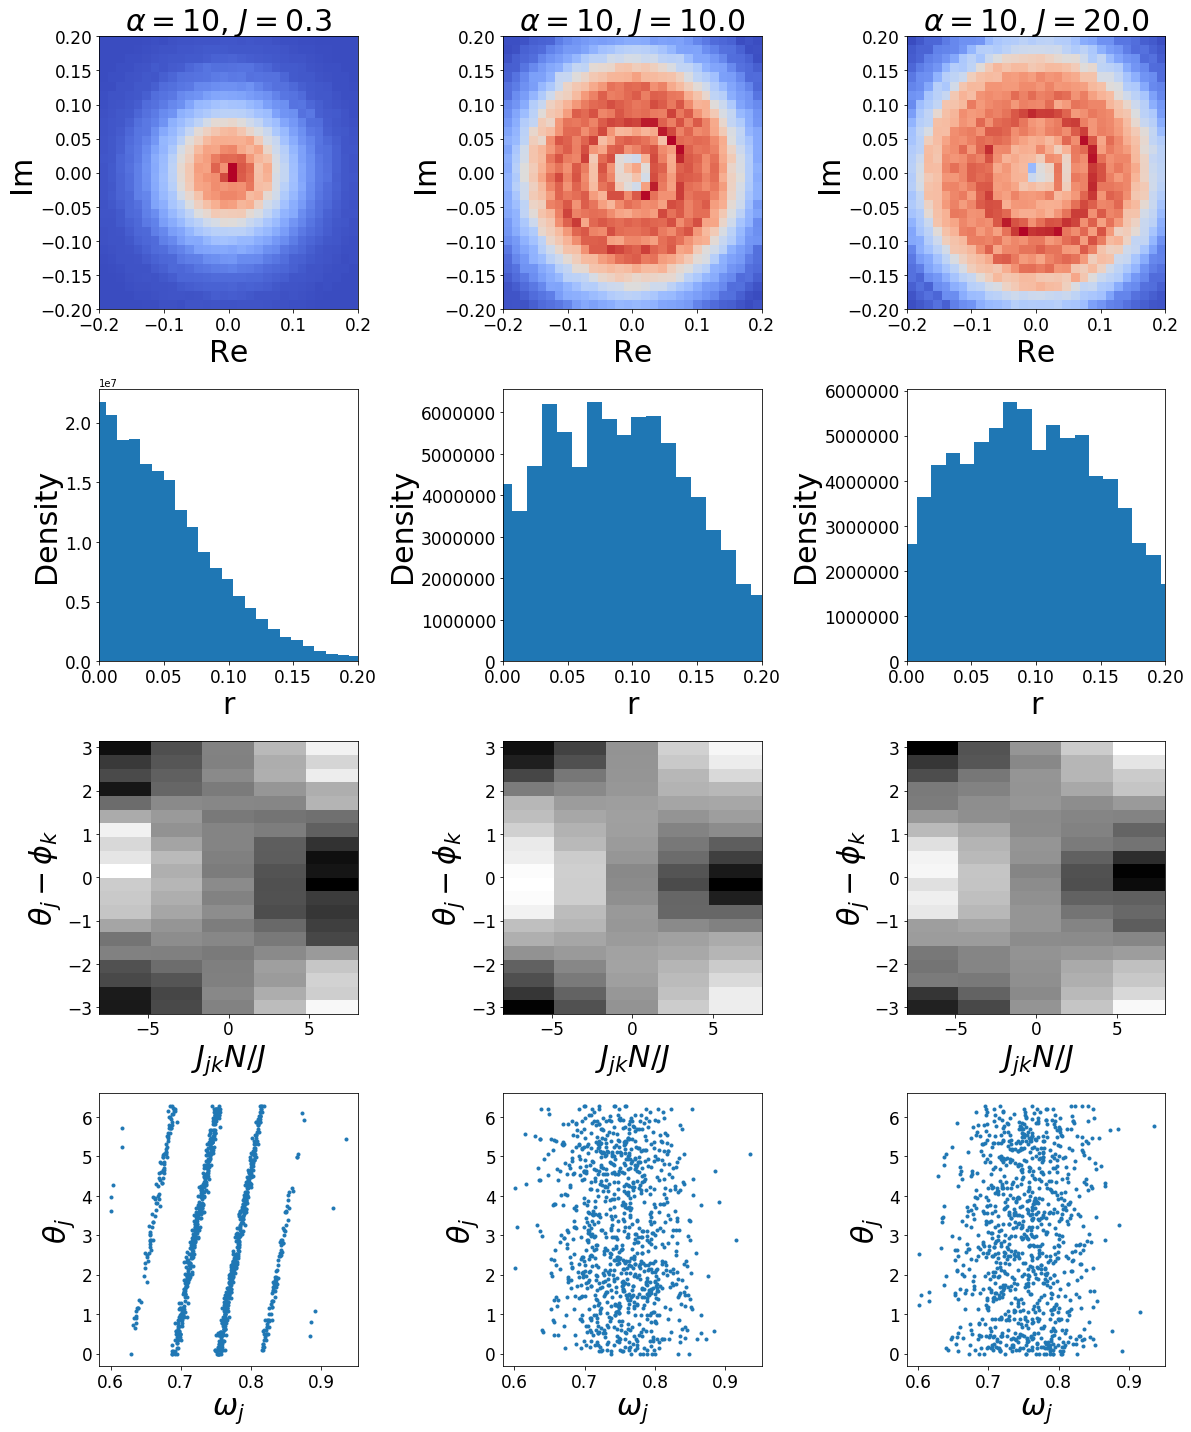

In [63]:
# rcParams['figure.figsize'] = 16, 5
# rcParams['figure.figsize'] = 4.85, 10
ticksize = 17
titelsize = 30
labelsize =30
legendsize = 20
t_start = 800
lim=.2
alpha = 10
bins =30

f,ax = plt.subplots(4,3,figsize=(5.5*3,20))

# J=0.3
phasesDyn= phasesDyn03a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=0.3
x = LF.flatten().real
y = LF.flatten().imag


ax[0][0].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][0].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][0].set_xlabel(r'Re',fontsize=labelsize)
ax[0][0].set_ylabel(r'Im',fontsize=labelsize)


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][0].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
ax[1][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][0].set_xlabel(r'r',fontsize=labelsize)
ax[1][0].set_ylabel(r'Density',fontsize=labelsize)
ax[1][0].set_xlim((0,lim))

theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()

H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][0].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][0].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][0].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)


ax[3][0].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][0].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][0].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][0].set_ylabel(r'$\theta_j$',fontsize=labelsize)


# J=10
phasesDyn =phasesDyn10a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=10
x = LF.flatten().real
y = LF.flatten().imag


ax[0][1].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][1].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][1].set_xlabel(r'Re',fontsize=labelsize)
ax[0][1].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][1].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
# ax[1].set_title(r'$\alpha$=%2d, J=%2.1f'%(alpha,J),fontsize=titelsize)
ax[1][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][1].set_xlabel(r'r',fontsize=labelsize)
ax[1][1].set_ylabel(r'Density',fontsize=labelsize)
ax[1][1].set_xlim((0,lim))


theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()
H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][1].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][1].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][1].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)



ax[3][1].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][1].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][1].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][1].set_ylabel(r'$\theta_j$',fontsize=labelsize)

# J=20
phasesDyn=phasesDyn20a10
LF=(JN@np.exp(1j*phasesDyn[t_start:-1].T)/N)
J=20
x = LF.flatten().real
y = LF.flatten().imag


ax[0][2].hist2d(x, y,range= [[-lim,lim], [-lim,lim]], bins=(bins,bins),cmap=plt.cm.coolwarm)
ax[0][2].set_title(r'$\alpha =%2d $, $J =%2.1f$'%(alpha,J),fontsize=titelsize)
ax[0][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[0][2].set_xlabel(r'Re',fontsize=labelsize)
ax[0][2].set_ylabel(r'Im',fontsize=labelsize)
# ax[0].axis('equal')


hist, bin_edges = np.histogram(np.abs(LF.T),bins=bins)
ax[1][2].bar(bin_edges[:-1],hist/(bin_edges[1:]**2-bin_edges[:-1]**2),width=np.diff(bin_edges))
# ax[1].set_title(r'$\alpha$=%2d, J=%2.1f'%(alpha,J),fontsize=titelsize)
ax[1][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[1][2].set_xlabel(r'r',fontsize=labelsize)
ax[1][2].set_ylabel(r'Density',fontsize=labelsize)
ax[1][2].set_xlim((0,lim))

theta_j=phasesDyn[-1:]
LF=(JN@np.exp(1j*theta_j.T)/N)
phi_k= (np.angle(LF.T))

centered_LF=(theta_j[:,np.newaxis,:]-phi_k[:,:,np.newaxis])%(2*np.pi)
centered_LF= np.where(centered_LF>np.pi,centered_LF-2*np.pi,centered_LF )
x=np.tile(JN, ((len(theta_j)),1,1)).flatten()
y=centered_LF.flatten()



H, xedges, yedges  = np.histogram2d(x,y,bins=(5,20))
row_sums = H.sum(axis=1)
new_matrix = H / row_sums[ :,np.newaxis]
X, Y = np.meshgrid(xedges, yedges)
ax[2][2].pcolormesh(X, Y, new_matrix.T,cmap=plt.cm.gray_r)
ax[2][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[2][2].set_xlabel(r'$J_{jk}N/J$',fontsize=labelsize)
ax[2][2].set_ylabel(r'$\theta_j-\phi_k$',fontsize=labelsize)

ax[3][2].plot(sample[arg], phasesDyn[-2][arg],'.')
ax[3][2].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3][2].set_xlabel(r'$\omega_j$',fontsize=labelsize)
ax[3][2].set_ylabel(r'$\theta_j$',fontsize=labelsize)

plt.tight_layout()